# Kinetic binding test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Simulation of kinetic binding test

### Without koff

In [3]:
def kinetic_binding_without_koff(concentration_ac_initial, concentration_ag_initial, kon, duration, time_step):

    # Tab with time points sequences 
    time_points = np.arange(0, duration, time_step)  

    # Initialisation of the lists with complexe, AC and AG initial concentrations  
    concentrations_complex = [0]
    concentrations_ac = [concentration_ac_initial]
    concentrations_ag = [concentration_ag_initial]

    concentration_ac = concentration_ac_initial
    concentration_ag = concentration_ag_initial

    for t in time_points[1:]:
     
        d_complex_dt = kon * concentration_ac * concentration_ag
        concentration_complex = concentrations_complex[-1] + d_complex_dt * time_step

        # Update of current concentrations of AC and AG 
        concentration_ac = concentration_ac - (concentration_ac_initial / duration * time_step)
        concentration_ag = concentration_ag - (concentration_ag_initial / duration * time_step)
        
        # Add the current concentrations to the correspondant lists 
        concentrations_ac.append(concentration_ac)
        concentrations_ag.append(concentration_ag)
        concentrations_complex.append(concentration_complex)
    
    return time_points, concentrations_complex, concentrations_ac, concentrations_ag

Paramètres

In [4]:
concentration_ac_initial = 2e-5       # initial concentration of Anti-Body in mol
concentration_ag_initial = 1e-5       # initial concentration of Anti-Gène in mol 
kon = 1e4                             # association constant in mol-1 s-1
duration = 600                        # duration of simulation in s
time_step = 1e-1                      # step time in s

time_points, concentrations_complex, concentrations_ac, concentrations_ag = kinetic_binding_without_koff(concentration_ac_initial, concentration_ag_initial, kon, duration, time_step)        

Plots

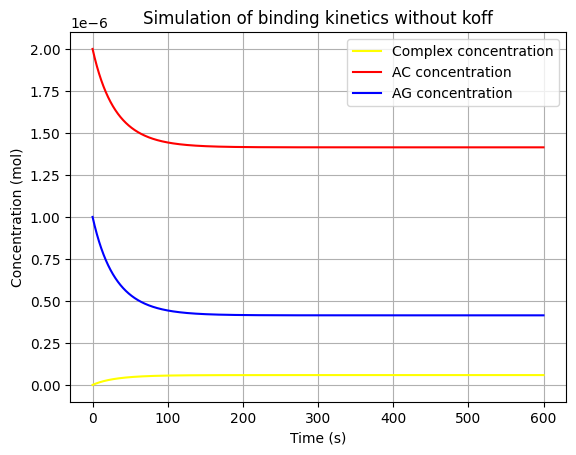

In [72]:
plt.grid(True)
plt.plot(time_points, concentrations_complex, color='yellow', label='Complex concentration')
plt.plot(time_points, concentrations_ac, color ='red', label='AC concentration')
plt.plot(time_points, concentrations_ag, color='blue', label= 'AG concentration')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol)')
plt.title('Simulation of binding kinetics without koff')
plt.legend()
plt.show()


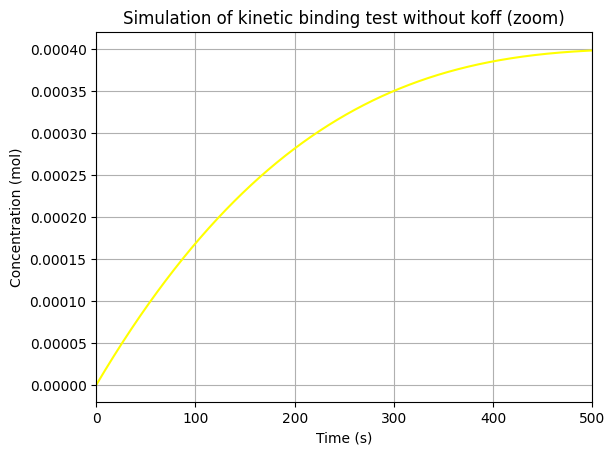

In [6]:
plt.grid(True)
plt.plot(time_points, concentrations_complex, color ='yellow')
t_inf = 0
t_sup = 500
plt.xlim(t_inf, t_sup)
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol)')
plt.title('Simulation of kinetic binding test without koff (zoom)')
plt.show()

### With Koff

In [7]:
def kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step):

    # Tab with points time sequences 
    time_points = np.arange(0, duration, time_step) 

    # Initialisation of the lists with complexe, AC and AG initial concentrations  
    concentrations_complex = [0]
    concentrations_ac = [concentration_ac_initial]
    concentrations_ag = [concentration_ag_initial]

    concentration_ac = concentration_ac_initial
    concentration_ag = concentration_ag_initial

    for t in time_points[1:]:
        
        d_complex_dt = kon * concentration_ac * concentration_ag - koff * concentrations_complex[-1]
        concentration_complex = concentrations_complex[-1] + d_complex_dt * time_step
        #print(f"concentration_complex at t = {t} is {concentration_complex}")

        # Update of current concentrations of AC and AG
        concentration_ac = concentration_ac - d_complex_dt
        concentration_ag = concentration_ag - d_complex_dt

        # Add current concentrations to the correspondant lists 
        concentrations_ac.append(concentration_ac)
        concentrations_ag.append(concentration_ag)
        concentrations_complex.append(concentration_complex)
        
    return time_points, concentrations_complex, concentrations_ac, concentrations_ag

Paramètres

In [8]:
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e3                         # association constant in mol-1 s-1
koff = 1e-2                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points, concentrations_complex, concentrations_ac, concentrations_ag = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

Plots

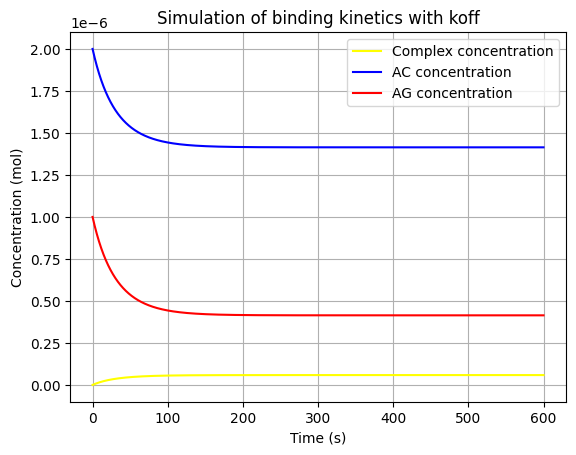

In [70]:
plt.grid(True)
plt.plot(time_points, concentrations_complex, color ='yellow', label='Complex concentration')
plt.plot(time_points, concentrations_ac, color='blue', label='AC concentration')
plt.plot(time_points, concentrations_ag, color ='red', label ='AG concentration')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol)')
plt.title('Simulation of binding kinetics with koff')
plt.legend()
plt.show()

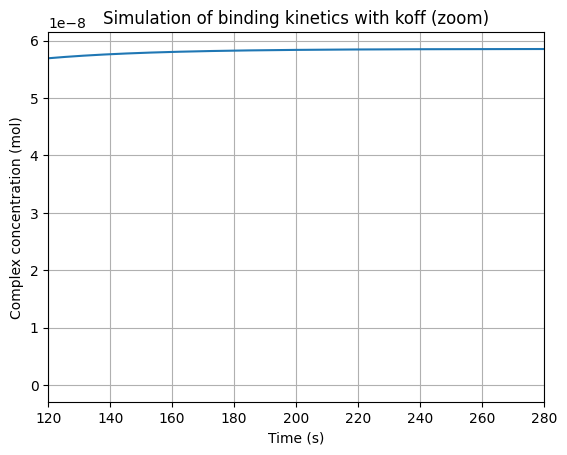

In [71]:
plt.grid(True)
plt.plot(time_points, concentrations_complex)

# Time interval to zoom on
t_zoom_start = 120    # beginning 
t_zoom_end = 280    # end 
# Zoom
plt.xlim(t_zoom_start, t_zoom_end)

plt.xlabel('Time (s)')
plt.ylabel('Complex concentration (mol)')
plt.title('Simulation of binding kinetics with koff (zoom)')
plt.show()

## Tests with different koff and kon

## Kon fixe

#### Kon = 1e4

In [11]:
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e4                         # association constant in mol-1 s-1
koff = 1e-2                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_1, concentrations_complex_1, concentrations_ac_1, concentrations_ag_1 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [12]:
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e4                         # association constant in mol-1 s-1
koff = 1e-3                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_2, concentrations_complex_2, concentrations_ac_2, concentrations_ag_2 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [13]:
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e4                         # association constant in mol-1 s-1
koff = 1e-4                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_3, concentrations_complex_3, concentrations_ac_3, concentrations_ag_3 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [14]:
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e4                         # association constant in mol-1 s-1
koff = 1e-5                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_4, concentrations_complex_4, concentrations_ac_4, concentrations_ag_4 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

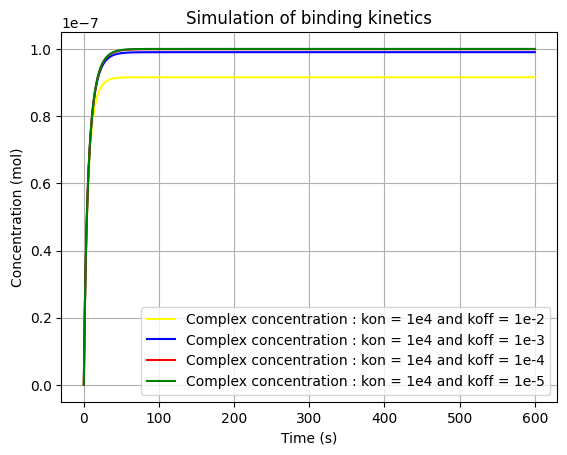

In [69]:
plt.grid(True)
plt.plot(time_points_1, concentrations_complex_1, color ='yellow', label='Complex concentration : kon = 1e4 and koff = 1e-2')
plt.plot(time_points_2, concentrations_complex_2, color='blue', label='Complex concentration : kon = 1e4 and koff = 1e-3')
plt.plot(time_points_3, concentrations_complex_3, color ='red', label ='Complex concentration : kon = 1e4 and koff = 1e-4')
plt.plot(time_points_4, concentrations_complex_4, color ='green', label ='Complex concentration : kon = 1e4 and koff = 1e-5')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol)')
plt.title('Simulation of binding kinetics')
plt.legend()
plt.show()

#### Kon = 1e3 

In [16]:
# Koff = 1e-2
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e3                         # association constant in mol-1 s-1
koff = 1e-2                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_5, concentrations_complex_5, concentrations_ac_5, concentrations_ag_5 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [17]:
# Koff = 1e-3
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e3                         # association constant in mol-1 s-1
koff = 1e-3                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_6, concentrations_complex_6, concentrations_ac_6, concentrations_ag_6 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [18]:
# Koff = 1e-4
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e3                         # association constant in mol-1 s-1
koff = 1e-4                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_7, concentrations_complex_7, concentrations_ac_7, concentrations_ag_7 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [19]:
# Koff = 1e-5
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e3                         # association constant in mol-1 s-1
koff = 1e-5                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_8, concentrations_complex_8, concentrations_ac_8, concentrations_ag_8 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

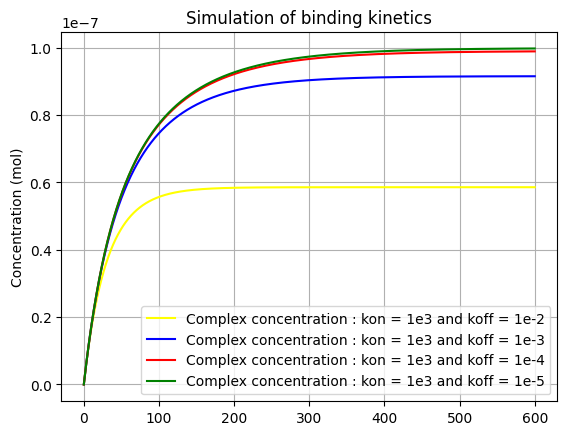

In [68]:
plt.grid(True)
plt.plot(time_points_5, concentrations_complex_5, color ='yellow', label='Complex concentration : kon = 1e3 and koff = 1e-2')
plt.plot(time_points_6, concentrations_complex_6, color='blue', label='Complex concentration : kon = 1e3 and koff = 1e-3')
plt.plot(time_points_7, concentrations_complex_7, color ='red', label ='Complex concentration : kon = 1e3 and koff = 1e-4')
plt.plot(time_points_8, concentrations_complex_8, color ='green', label ='Complex concentration : kon = 1e3 and koff = 1e-5')
# plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol)')
plt.title('Simulation of binding kinetics')
plt.legend()
plt.show()

#### Kon = 1e2

In [21]:
# Koff = 1e-2
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e2                         # association constant in mol-1 s-1
koff = 1e-2                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_9, concentrations_complex_9, concentrations_ac_9, concentrations_ag_9 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [22]:
# Koff = 1e-3
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e2                         # association constant in mol-1 s-1
koff = 1e-3                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_10, concentrations_complex_10, concentrations_ac_10, concentrations_ag_10 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [23]:
# Koff = 1e-4
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e2                         # association constant in mol-1 s-1
koff = 1e-4                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_11, concentrations_complex_11, concentrations_ac_11, concentrations_ag_11 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [24]:
# Koff = 1e-5
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e2                         # association constant in mol-1 s-1
koff = 1e-5                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_12, concentrations_complex_12, concentrations_ac_12, concentrations_ag_12 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

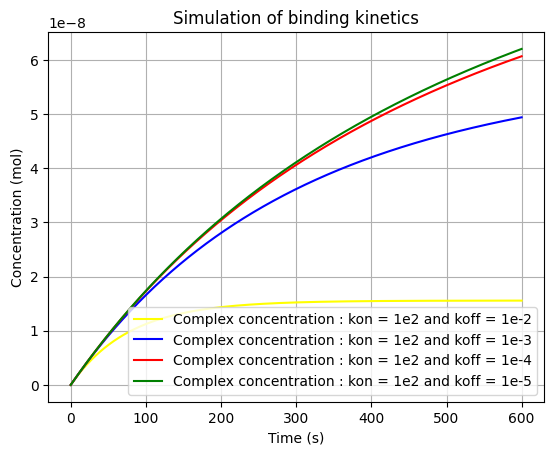

In [67]:
plt.grid(True)
plt.plot(time_points_9, concentrations_complex_9, color ='yellow', label='Complex concentration : kon = 1e2 and koff = 1e-2')
plt.plot(time_points_10, concentrations_complex_10, color='blue', label='Complex concentration : kon = 1e2 and koff = 1e-3')
plt.plot(time_points_11, concentrations_complex_11, color ='red', label ='Complex concentration : kon = 1e2 and koff = 1e-4')
plt.plot(time_points_12, concentrations_complex_12, color ='green', label ='Complex concentration : kon = 1e2 and koff = 1e-5')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol)')
plt.title('Simulation of binding kinetics')
plt.legend()
plt.show()

#### Kon = 1e5

In [26]:
# Koff = 1e-2
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e5                         # association constant in mol-1 s-1
koff = 1e-2                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_13, concentrations_complex_13, concentrations_ac_13, concentrations_ag_13 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [27]:
# Koff = 1e-3
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e5                         # association constant in mol-1 s-1
koff = 1e-3                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_14, concentrations_complex_14, concentrations_ac_14, concentrations_ag_14 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [28]:
# Koff = 1e-4
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e5                         # association constant in mol-1 s-1
koff = 1e-4                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_15, concentrations_complex_15, concentrations_ac_15, concentrations_ag_15 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [29]:
# koff = 1e-5
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e5                         # association constant in mol-1 s-1
koff = 1e-5                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_16, concentrations_complex_16, concentrations_ac_16, concentrations_ag_16 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

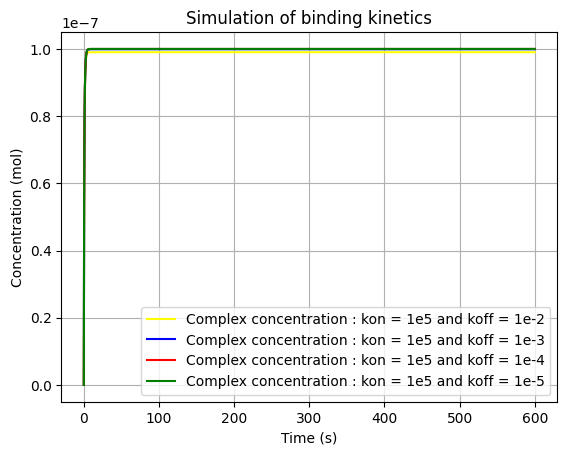

In [66]:
plt.grid(True)
plt.plot(time_points_13, concentrations_complex_13, color ='yellow', label='Complex concentration : kon = 1e5 and koff = 1e-2')
plt.plot(time_points_14, concentrations_complex_14, color='blue', label='Complex concentration : kon = 1e5 and koff = 1e-3')
plt.plot(time_points_15, concentrations_complex_15, color ='red', label ='Complex concentration : kon = 1e5 and koff = 1e-4')
plt.plot(time_points_16, concentrations_complex_16, color ='green', label ='Complex concentration : kon = 1e5 and koff = 1e-5')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol)')
plt.title('Simulation of binding kinetics')
plt.legend()
plt.show()

#### Kon = 1e1

In [31]:
# Koff = 1e-2
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e1                         # association constant in mol-1 s-1
koff = 1e-2                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_17, concentrations_complex_17, concentrations_ac_17, concentrations_ag_17 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [32]:
# Koff = 1e-3
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e1                         # association constant in mol-1 s-1
koff = 1e-3                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_18, concentrations_complex_18, concentrations_ac_18, concentrations_ag_18 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [33]:
# Koff = 1e-4
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e1                         # association constant in mol-1 s-1
koff = 1e-4                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_19, concentrations_complex_19, concentrations_ac_19, concentrations_ag_19 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [34]:
# Koff = 1e-5
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e1                         # association constant in mol-1 s-1
koff = 1e-5                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_20, concentrations_complex_20, concentrations_ac_20, concentrations_ag_20 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

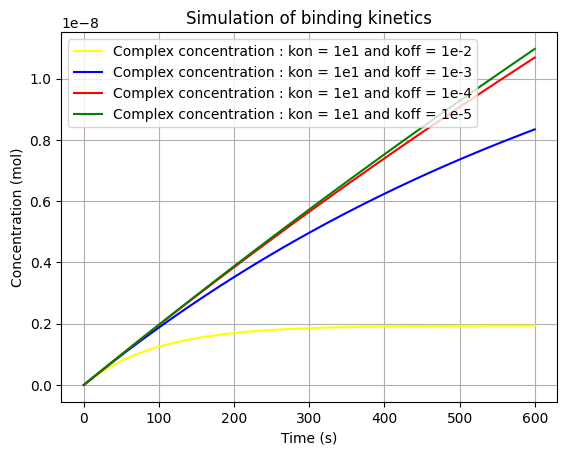

In [65]:
plt.grid(True)
plt.plot(time_points_17, concentrations_complex_17, color ='yellow', label='Complex concentration : kon = 1e1 and koff = 1e-2')
plt.plot(time_points_18, concentrations_complex_18, color='blue', label='Complex concentration : kon = 1e1 and koff = 1e-3')
plt.plot(time_points_19, concentrations_complex_19, color ='red', label ='Complex concentration : kon = 1e1 and koff = 1e-4')
plt.plot(time_points_20, concentrations_complex_20, color ='green', label ='Complex concentration : kon = 1e1 and koff = 1e-5')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol)')
plt.title('Simulation of binding kinetics')
plt.legend()
plt.show()

## Koff fixe

#### Koff = 1e-2


In [36]:
# Kon = 1e5
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e5                         # association constant in mol-1 s-1
koff = 1e-2                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_21, concentrations_complex_21, concentrations_ac_21, concentrations_ag_21 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [37]:
# Kon = 1e4
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e4                         # association constant in mol-1 s-1
koff = 1e-2                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_22, concentrations_complex_22, concentrations_ac_22, concentrations_ag_22 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [38]:
# Kon = 1e3
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e3                         # association constant in mol-1 s-1
koff = 1e-2                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_23, concentrations_complex_23, concentrations_ac_23, concentrations_ag_23 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [39]:
# Kon = 1e2
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e2                         # association constant in mol-1 s-1
koff = 1e-2                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_24, concentrations_complex_24, concentrations_ac_24, concentrations_ag_24 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

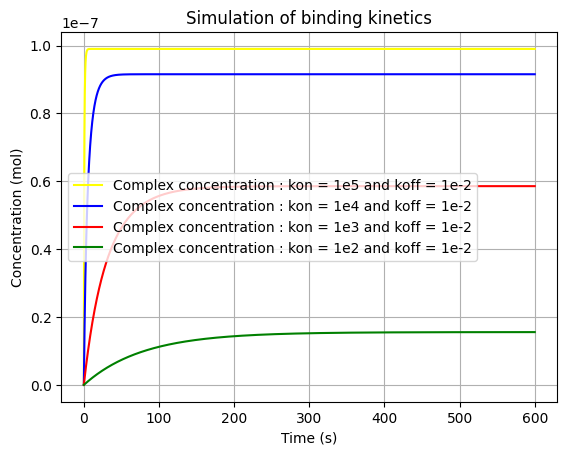

In [64]:
plt.grid(True)
plt.plot(time_points_21, concentrations_complex_21, color ='yellow', label='Complex concentration : kon = 1e5 and koff = 1e-2')
plt.plot(time_points_22, concentrations_complex_22, color ='blue', label ='Complex concentration : kon = 1e4 and koff = 1e-2')
plt.plot(time_points_23, concentrations_complex_23, color='red', label='Complex concentration : kon = 1e3 and koff = 1e-2')
plt.plot(time_points_24, concentrations_complex_24, color ='green', label ='Complex concentration : kon = 1e2 and koff = 1e-2')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol)')
plt.title('Simulation of binding kinetics')
plt.legend()
plt.show()

#### Koff = 1e-3

In [41]:
# Kon = 1e5
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e5                         # association constant in mol-1 s-1
koff = 1e-3                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_25, concentrations_complex_25, concentrations_ac_25, concentrations_ag_25 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [42]:
# Kon = 1e4
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e4                         # association constant in mol-1 s-1
koff = 1e-3                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_26, concentrations_complex_26, concentrations_ac_26, concentrations_ag_26 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [43]:
# Kon = 1e3
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e3                         # association constant in mol-1 s-1
koff = 1e-3                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_27, concentrations_complex_27, concentrations_ac_27, concentrations_ag_27 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [44]:
# Kon = 1e5
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e2                         # association constant in mol-1 s-1
koff = 1e-3                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_28, concentrations_complex_28, concentrations_ac_28, concentrations_ag_28 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

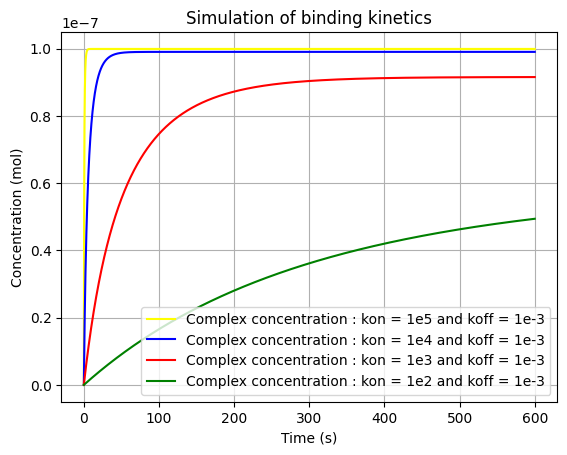

In [63]:
plt.grid(True)
plt.plot(time_points_25, concentrations_complex_25, color ='yellow', label='Complex concentration : kon = 1e5 and koff = 1e-3')
plt.plot(time_points_26, concentrations_complex_26, color ='blue', label ='Complex concentration : kon = 1e4 and koff = 1e-3')
plt.plot(time_points_27, concentrations_complex_27, color='red', label='Complex concentration : kon = 1e3 and koff = 1e-3')
plt.plot(time_points_28, concentrations_complex_28, color ='green', label ='Complex concentration : kon = 1e2 and koff = 1e-3')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol)')
plt.title('Simulation of binding kinetics')
plt.legend()
plt.show()

#### Koff = 1e-4

In [46]:
# Kon = 1e5
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e5                         # association constant in mol-1 s-1
koff = 1e-4                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_29, concentrations_complex_29, concentrations_ac_29, concentrations_ag_29 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [47]:
# Kon = 1e4
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e4                         # association constant in mol-1 s-1
koff = 1e-3                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_30, concentrations_complex_30, concentrations_ac_30, concentrations_ag_30 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [48]:
# Kon = 1e3
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e3                         # association constant in mol-1 s-1
koff = 1e-3                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_31, concentrations_complex_31, concentrations_ac_31, concentrations_ag_31 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [49]:
# Kon = 1e2
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e2                         # association constant in mol-1 s-1
koff = 1e-3                       # dissociation constant in s-1
duration = 600                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_32, concentrations_complex_32, concentrations_ac_32, concentrations_ag_32 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

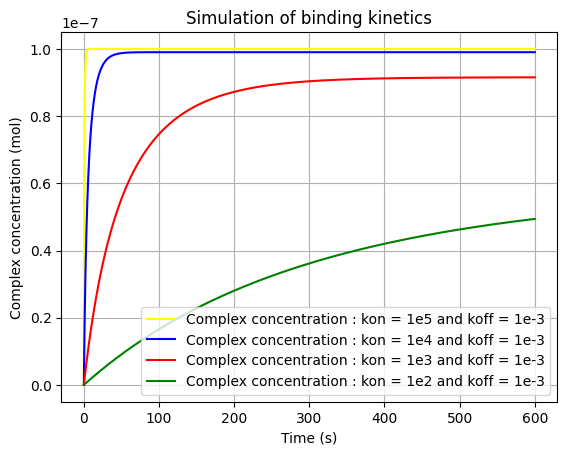

In [62]:
plt.grid(True)
plt.plot(time_points_29, concentrations_complex_29, color = 'yellow', label='Complex concentration : kon = 1e5 and koff = 1e-3')
plt.plot(time_points_30, concentrations_complex_30, color = 'blue', label='Complex concentration : kon = 1e4 and koff = 1e-3')
plt.plot(time_points_31, concentrations_complex_31, color = 'red', label='Complex concentration : kon = 1e3 and koff = 1e-3')
plt.plot(time_points_32, concentrations_complex_32, color = 'green', label='Complex concentration : kon = 1e2 and koff = 1e-3')
plt.xlabel('Time (s)')
plt.ylabel('Complex concentration (mol)')
plt.title('Simulation of binding kinetics')
plt.legend()
plt.show()

#### Koff = 1e-5

In [89]:
# Kon = 1e5
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e5                         # association constant in mol-1 s-1
koff = 1e-5                       # dissociation constant in s-1
duration = 300                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_33, concentrations_complex_33, concentrations_ac_33, concentrations_ag_33 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [90]:
# Kon = 1e4
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e4                         # association constant in mol-1 s-1
koff = 1e-5                       # dissociation constant in s-1
duration = 300                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_34, concentrations_complex_34, concentrations_ac_34, concentrations_ag_34 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [91]:
# Kon = 1e3
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e3                         # association constant in mol-1 s-1
koff = 1e-5                       # dissociation constant in s-1
duration = 300                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_35, concentrations_complex_35, concentrations_ac_35, concentrations_ag_35 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [92]:
# Kon = 1e2
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e2                         # association constant in mol-1 s-1
koff = 1e-5                       # dissociation constant in s-1
duration = 300                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_36, concentrations_complex_36, concentrations_ac_36, concentrations_ag_36 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

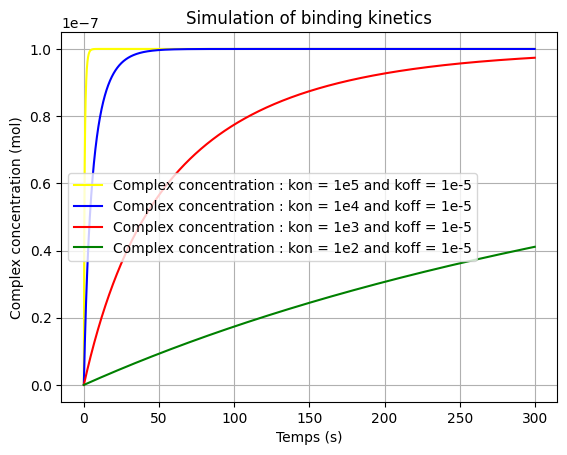

In [93]:
plt.grid(True)
plt.plot(time_points_33, concentrations_complex_33, color='yellow', label='Complex concentration : kon = 1e5 and koff = 1e-5')
plt.plot(time_points_34, concentrations_complex_34, color='blue', label='Complex concentration : kon = 1e4 and koff = 1e-5')
plt.plot(time_points_35, concentrations_complex_35, color='red', label='Complex concentration : kon = 1e3 and koff = 1e-5')
plt.plot(time_points_36, concentrations_complex_36, color='green', label='Complex concentration : kon = 1e2 and koff = 1e-5')
plt.xlabel('Temps (s)')
plt.ylabel('Complex concentration (mol)')
plt.title('Simulation of binding kinetics')
plt.legend()
plt.show()

#### Koff = 1e-6

In [94]:
# Kon = 1e5
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e5                         # association constant in mol-1 s-1
koff = 1e-6                       # dissociation constant in s-1
duration = 300                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_37, concentrations_complex_37, concentrations_ac_37, concentrations_ag_37 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [95]:
# Kon = 1e4
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e4                         # association constant in mol-1 s-1
koff = 1e-6                       # dissociation constant in s-1
duration = 300                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_38, concentrations_complex_38, concentrations_ac_38, concentrations_ag_38 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [96]:
# Kon = 1e3
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e3                         # association constant in mol-1 s-1
koff = 1e-6                       # dissociation constant in s-1
duration = 300                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_39, concentrations_complex_39, concentrations_ac_39, concentrations_ag_39 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [97]:
# Kon = 1e5
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e2                         # association constant in mol-1 s-1
koff = 1e-6                       # dissociation constant in s-1
duration = 300                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_40, concentrations_complex_40, concentrations_ac_40, concentrations_ag_40 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

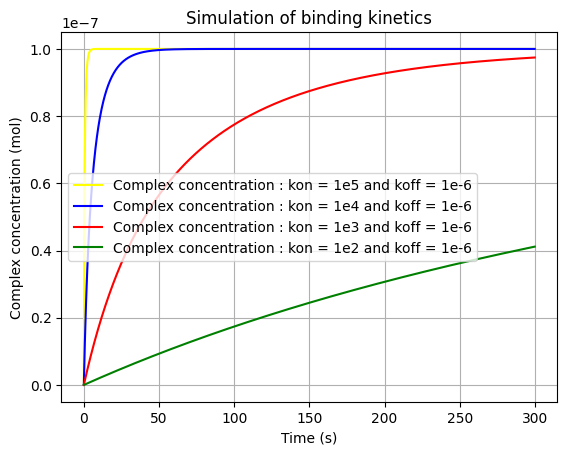

In [98]:
plt.grid(True)
plt.plot(time_points_37, concentrations_complex_37, color='yellow', label='Complex concentration : kon = 1e5 and koff = 1e-6')
plt.plot(time_points_38, concentrations_complex_38, color='blue', label='Complex concentration : kon = 1e4 and koff = 1e-6')
plt.plot(time_points_39, concentrations_complex_39, color='red', label='Complex concentration : kon = 1e3 and koff = 1e-6')
plt.plot(time_points_40, concentrations_complex_40, color='green', label='Complex concentration : kon = 1e2 and koff = 1e-6')
plt.xlabel('Time (s)')
plt.ylabel('Complex concentration (mol)')
plt.title('Simulation of binding kinetics')
plt.legend()
plt.show()

#### Koff = 1e-1

In [99]:
# Kon = 1e5
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e5                         # association constant in mol-1 s-1
koff = 1e-1                       # dissociation constant in s-1
duration = 300                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_41, concentrations_complex_41, concentrations_ac_41, concentrations_ag_41 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [101]:
# Kon = 1e4
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e4                         # association constant in mol-1 s-1
koff = 1e-1                       # dissociation constant in s-1
duration = 300                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_42, concentrations_complex_42, concentrations_ac_42, concentrations_ag_42 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [102]:
# Kon = 1e3
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e3                         # association constant in mol-1 s-1
koff = 1e-1                       # dissociation constant in s-1
duration = 300                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_43, concentrations_complex_43, concentrations_ac_43, concentrations_ag_43 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

In [103]:
# Kon = 1e2
concentration_ac_initial = 2e-6   # initial concentration of AC in mol
concentration_ag_initial = 1e-6   # initial concentration of AG in mol
kon = 1e2                         # association constant in mol-1 s-1
koff = 1e-1                       # dissociation constant in s-1
duration = 300                    # duration of the simulation en s 
time_step = 1e-1                  # step time in s

time_points_44, concentrations_complex_44, concentrations_ac_44, concentrations_ag_44 = kinetic_binding(concentration_ac_initial, concentration_ag_initial, kon, koff, duration, time_step)

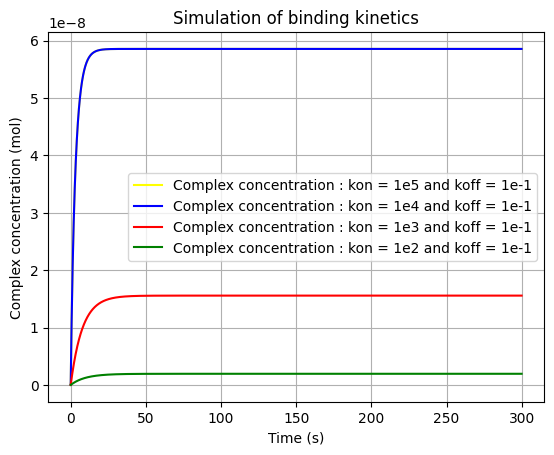

In [104]:
plt.grid(True)
plt.plot(time_points_41, concentrations_complex_41, color = 'yellow', label='Complex concentration : kon = 1e5 and koff = 1e-1')
plt.plot(time_points_42, concentrations_complex_42, color = 'blue', label='Complex concentration : kon = 1e4 and koff = 1e-1')
plt.plot(time_points_43, concentrations_complex_43, color = 'red', label='Complex concentration : kon = 1e3 and koff = 1e-1')
plt.plot(time_points_44, concentrations_complex_44, color = 'green', label='Complex concentration : kon = 1e2 and koff = 1e-1')
plt.xlabel('Time (s)')
plt.ylabel('Complex concentration (mol)')
plt.title('Simulation of binding kinetics')
plt.legend()
plt.show()